# Packages

In [40]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [41]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)

# Results

In [42]:
### Time ###
print("DUREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))

DUREAL Time (minutes): Mean: 10.23| Max: 31.05
UNREAL Time (minutes): Mean: 10.28| Max: 30.93


(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

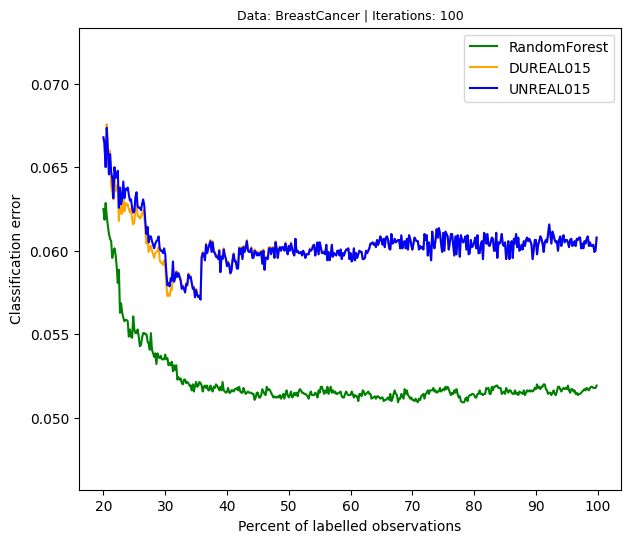

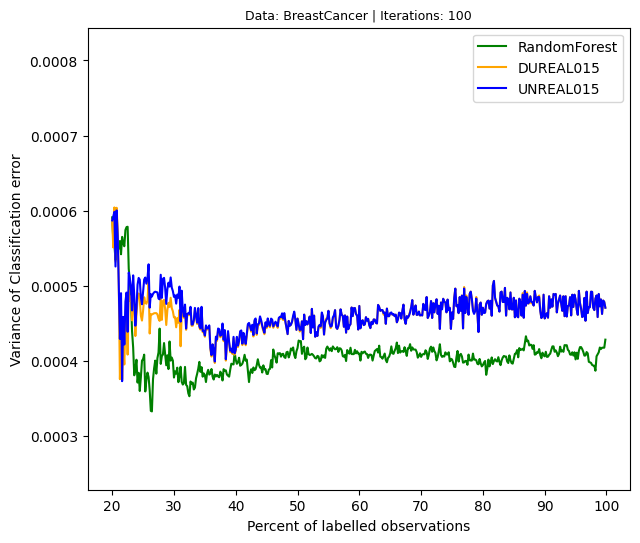

In [43]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {"RandomForest" : "green",
          "DUREAL015" : "orange",
          "UNREAL015" : "blue"
          }

### Figure ##
MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 Colors = colors,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

---

# Selection History

In [44]:
from collections import Counter

In [45]:
from collections import Counter
import pandas as pd

### Input ###
M = 20
# FirstMIterationsRFL = RandomForesResults["SelectionHistory_RF"].iloc[:, 0:M].to_numpy().flatten()
FirstMIterationsUNREAL = AnalyzedData015["SelectionHistory_UNREAL"].iloc[:, 0:M].to_numpy().flatten()
FirstMIterationsDUREAL = AnalyzedData015["SelectionHistory_DUREAL"].iloc[:, 0:M].to_numpy().flatten()

### Counter ###
# Counter_RF = Counter(FirstMIterationsRFL)
Counter_UNREAL = Counter(FirstMIterationsUNREAL)
Counter_DUREAL = Counter(FirstMIterationsDUREAL)

### Convert Counter to DataFrame ###
# Counter_RF = pd.DataFrame.from_dict(Counter_RF, orient='index', columns=['RFL'])
Counter_UNREAL = pd.DataFrame.from_dict(Counter_UNREAL, orient='index', columns=['UNREAL'])
Counter_DUREAL = pd.DataFrame.from_dict(Counter_DUREAL, orient='index', columns=['DUREAL'])

### Combine DataFrames ###
CombinedCounter = pd.concat([ Counter_UNREAL, Counter_DUREAL], axis=1)
CombinedCounter = CombinedCounter.join(LoadData(DataType), how='left')


In [46]:
CombinedCounter

,UNREAL,DUREAL,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
123,4.0,3,0,0,0,0,1,0,0,1,0,0,1
240,33.0,34,0,1,0,0,0,1,0,0,0,0,0
636,10.0,10,1,0,1,0,0,0,1,0,0,1,1
552,11.0,11,0,0,0,0,0,1,1,0,0,0,0
177,32.0,33,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,NaN,1,0,0,0,0,0,0,0,0,0,1,1
268,NaN,1,1,0,0,0,0,0,0,0,0,0,1
522,NaN,1,1,0,0,0,0,0,0,0,0,0,1
664,NaN,1,0,1,0,1,0,1,1,0,1,0,0


In [47]:
CombinedCounter

,UNREAL,DUREAL,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
123,4.0,3,0,0,0,0,1,0,0,1,0,0,1
240,33.0,34,0,1,0,0,0,1,0,0,0,0,0
636,10.0,10,1,0,1,0,0,0,1,0,0,1,1
552,11.0,11,0,0,0,0,0,1,1,0,0,0,0
177,32.0,33,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,NaN,1,0,0,0,0,0,0,0,0,0,1,1
268,NaN,1,1,0,0,0,0,0,0,0,0,0,1
522,NaN,1,1,0,0,0,0,0,0,0,0,0,1
664,NaN,1,0,1,0,1,0,1,1,0,1,0,0
